In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# Mnist 데이터 셋 호출하기
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [3]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size = 3, padding = 'same', input_shape=(28, 28, 1), activation = 'relu'))
autoencoder.add(MaxPooling2D(pool_size = 2, padding = 'same')) # 크기 반으로 축소
autoencoder.add((Conv2D(8, kernel_size = 3, activation = 'relu', padding = 'same')))
autoencoder.add(MaxPooling2D(pool_size = 2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu'))
# strides = 2 이므로 값이 축소됨. 

# (H(입력데이터) + 2P(패딩) - F(필터) / S(strides)) + 1

# 디코딩
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size = 3, activation = 'relu')) # 패딩 값이 없으므로 필터거치면 16에서 14로 줄어듬. 
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size = 3, padding = 'same', activation = 'sigmoid'))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

Epoch 1/50
469/469 [==============================] - 34s 71ms/step - loss: 0.3151 - val_loss: 0.1385
Epoch 2/50
469/469 [==============================] - 33s 71ms/step - loss: 0.1337 - val_loss: 0.1194
Epoch 3/50
469/469 [==============================] - 34s 72ms/step - loss: 0.1181 - val_loss: 0.1114
Epoch 4/50
469/469 [==============================] - 34s 73ms/step - loss: 0.1112 - val_loss: 0.1068
Epoch 5/50
469/469 [==============================] - 34s 74ms/step - loss: 0.1073 - val_loss: 0.1043
Epoch 6/50
469/469 [==============================] - 34s 73ms/step - loss: 0.1043 - val_loss: 0.1008
Epoch 7/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1014 - val_loss: 0.0985
Epoch 8/50
469/469 [==============================] - 35s 75ms/step - loss: 0.0991 - val_loss: 0.0965
Epoch 9/50
469/469 [==============================] - 34s 74ms/step - loss: 0.0975 - val_loss: 0.0951
Epoch 10/50
469/469 [==============================] - 35s 74ms/step - loss: 0.095

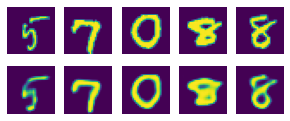

In [8]:
# 컴파일 및 학습하기
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 128, validation_data = (X_test, X_test))

# 학습 결과 출력하기
random_test = np.random.randint(X_test.shape[0], size = 5)

# 테스트할 이미지를 랜덤으로 호출하기
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기

plt.figure(figsize = (7, 2)) # 출력 이미지 크기 정하기

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지 차례로 나열하기
    ax = plt.subplot(2, 7, i + 1)
    # 테스트할 이미지를 먼저 그대로 보여주기
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off') # 축과 레이블 없애기
    ax = plt.subplot(2, 7, 7 + i + 1)
    # 오토인코딩 결과를 다음 열에 입력하기
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
    
plt.show()